# Анализ бизнес-показателей приложения Procrastinate Pro+

# Цель исследования:
Разобраться в причинах возникновения убытков и помочь компании выйти в плюс. \
Изучить:\
•	откуда приходят пользователи и какими устройствами они пользуются,\
•	сколько стоит привлечение пользователей из различных рекламных каналов;\
•	сколько денег приносит каждый клиент,\
•	когда расходы на привлечение клиента окупаются,\
•	какие факторы мешают привлечению клиентов.

# Описание проекта:
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:\
•	лог сервера с данными об их посещениях,\
•	выгрузка их покупок за этот период,\
•	рекламные расходы.\

# Описание данных:
В работе задействованы три датасета:\
Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта\
orders_info_short.csv — информацию о заказах\
costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:\
•	User Id — уникальный идентификатор пользователя,\
•	Region — страна пользователя,\
•	Device — тип устройства пользователя,\
•	Channel — идентификатор источника перехода,\
•	Session Start — дата и время начала сессии,\
•	Session End — дата и время окончания сессии.

Структура orders_info_short.csv:\
•	User Id — уникальный идентификатор пользователя,\
•	Event Dt — дата и время покупки,\
•	Revenue — сумма заказа.

Структура costs_info_short.csv:\
•	dt — дата проведения рекламной кампании,\
•	Channel — идентификатор рекламного источника,\
•	costs — расходы на эту кампанию.\


# План работы:

Шаг 1.
Загрузить данные и подготовить их к анализу: изучить наличие пропусков, дубликатов, соответствие типов данных.

Шаг 2. Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Шаг 3. Исследовательский анализ данных\
•	Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.\
•	Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.\
•	Выяснить какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.
Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.\
•	Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.\
Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Шаг 4. Маркетинг\
•	Посчитать общую сумму расходов на маркетинг.\
•	Выяснить, как траты распределены по рекламным источникам.\
•	Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.\
•	Расчитать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

Шаг 5. Оценить окупаемость рекламы\
Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы.\
•	Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.\
•	Проверить конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Построить и изучить графики конверсии и удержания.\
•	Проанализировать окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.\
•	Проанализировать окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.\
•	Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.\
•	Ответить на вопросы: \
o	Окупается ли реклама, направленная на привлечение пользователей в целом?\
o	Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?\
o	Чем могут быть вызваны проблемы окупаемости?\
Описать возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Шаг 6. Выводы\
•	Выделить причины неэффективности привлечения пользователей.\
•	Сформулировать рекомендации для отдела маркетинга.\


### Шаг. Загрузка данных. Подготовка к анализу

#### Загрузка данных

In [1]:
#Импотрируем все необходимые для работы бибилиотеки:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
#Загружаем данные в переменные:
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [3]:
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [6]:
#Переименуем названия столбцов в соответствии с правилами хорошего стиля:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
costs.columns = ['dt', 'channel', 'costs']

In [7]:
#Приведем содержимое столбцов к нижнему регистру, для поиска неявных дубликатов
visits['region'] = visits['region'].str.lower()
visits['device'] = visits['device'].str.lower()
visits['channel'] = visits['channel'].str.lower()
costs['channel'] = costs['channel'].str.lower()

In [8]:
visits.head(5)

,user_id,region,device,channel,session_start,session_end
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,united states,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,united states,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [9]:
costs.head(5)

,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1


Данные были успешно загружены в переменные. 
Названия и содержимое столбцов(с категориальными данными) были изменены в соответствии с правилами хорошего стиля для удобства дальнейшей работы с данными.

#### Пропуски и дубликаты

In [10]:
#Ищем пропуски
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [11]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [12]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [13]:
#Ищем дубликаты
visits.duplicated().sum()

0

In [14]:
orders.duplicated().sum()

0

In [15]:
costs.duplicated().sum()

0

Была проведена проверка таблиц на наличие пропусков и дубликатов.
Пропуски и дубликаты во всех трех таблицах отсутствуют.

#### Типы данных

In [16]:
#Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. 2019-05-01 02:36:01
visits.dtypes

user_id           int64
region           object
device           object
channel          object
session_start    object
session_end      object
dtype: object

In [17]:
#Visits - В столбцах 'session_start', 'session_end' изменим тип данных
#object -> datetime, для дальнейшего упрощения работы.
visits['session_start'] = pd.to_datetime(visits['session_start'], format = '%Y-%m-%d %H:%M:%S')
visits['session_end'] = pd.to_datetime(visits['session_start'], format = '%Y-%m-%d %H:%M:%S')

In [18]:
orders.dtypes

user_id       int64
event_dt     object
revenue     float64
dtype: object

In [19]:
#Orders - В столбце 'Event Dt' изменим тип данных object -> datetime.
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format = '%Y-%m-%d %H:%M:%S')

In [20]:
costs.dtypes

dt          object
channel     object
costs      float64
dtype: object

In [21]:
#Costs - В столбце 'dt изменим тип данных object -> datetime.
costs['dt'] = pd.to_datetime(costs['dt'])

Visits - В столбцах 'Session Start', 'Session End' изменим тип данных object -> datetime,\ 
Orders - В столбце 'Event Dt' изменим тип данных object -> datetime.\
Costs - В столбце 'dt изменим тип данных object -> datetime.\
Преобразование типов данных выполнили для дальнейшего упрощения работы с датой и временем.\

#### Выводы:
Данные были успешно загружены в переменные.\
Названия и содержимое столбцов были приведены в соответствие с правилами хорошего стиля.\
Пропуски и дубликаты во всех трех таблицах отсутствуют.\
Типы данных были приведены в соответствие с содержимым столбцов.

### Шаг. Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Функции для вычисления значений метрик:

In [22]:

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[ns]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [23]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [24]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [25]:
#LTV
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функции для построения графиков
filter_data() — для сглаживания данных, plot_retention() — для построения графика Retention Rate, plot_conversion() — для построения графика конверсии, plot_ltv_roi — для визуализации LTV и ROI.

In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [27]:
# функция для визуализации удержания/для построения графика Retention Rate

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [28]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [29]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Выводы:
Функции для вычисления значений метрик, а также функции для построения графиков были успешно заданы.

### Шаг. Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей

In [30]:
#Составим профили пользователей.
profiles = get_profiles(visits, orders, costs)

In [31]:
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [32]:
#Определим минимальную и максимальную даты привлечения пользователей.
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max() 

In [33]:
min_analysis_date

Timestamp('2019-05-01 00:00:00')

In [34]:
observation_date

Timestamp('2019-10-27 00:00:00')

Создали профили пользователей.
Минимальная дата привлечения пользователей - 1 мая 2019 года
Максимальная дата привлечения пользователей - 10 октября 2019 года

#### Распределение по странам
Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [35]:
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [36]:
payer_share = pd.DataFrame()
payer_share['users'] = profiles.groupby('region')['user_id'].count()
payer_share['payer_users'] = profiles.query('payer == True').groupby('region')['user_id'].count()
payer_share['share'] = 100*(payer_share['payer_users'] / payer_share['users'])

payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users,payer_users,share
region,,,
united states,100002,6902,6.9%
germany,14981,616,4.1%
uk,17575,700,4.0%
france,17450,663,3.8%


В приложение приходят пользователи из США, Германии, Великобритании, Франции.
Наибольшая доля платящих пользователей из США - 6.9%, наименьшая - из Франции - 3.8%

#### Распределение по устройствам
Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.


In [37]:
device_share = pd.DataFrame()
device_share['users'] = profiles.groupby('device')['user_id'].count()
device_share['payer_users'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_share['share'] = 100*(device_share['payer_users'] / device_share['users'])

device_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users,payer_users,share
device,,,
mac,30042,1912,6.4%
iphone,54479,3382,6.2%
android,35032,2050,5.9%
pc,30455,1537,5.0%


Клиенты приложения пользуются различными устройствами, среди которых: mac, iphone, android, pc.
Наибольшая доля платящих пользователей заходят в приложение с операционной системы mac - 6.4%, наименьшая - с персональных компьютеров - 5.0%

#### Рекламные источники
Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [38]:
channel_share = pd.DataFrame()
channel_share['users'] = profiles.groupby('channel')['user_id'].count()
channel_share['payer_users'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_share['share'] = 100*(channel_share['payer_users'] / channel_share['users'])

channel_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users,payer_users,share
channel,,,
faceboom,29144,3557,12.2%
adnonsense,3880,440,11.3%
lambdamediaads,2149,225,10.5%
tiptop,19561,1878,9.6%
rocketsuperads,4448,352,7.9%
wahoonetbanner,8553,453,5.3%
yrabbit,4312,165,3.8%
mediatornado,4364,156,3.6%
leapbob,8553,262,3.1%


In [39]:
profiles_with_organic = get_profiles(visits, orders, costs)

In [40]:
channel_share = pd.DataFrame()
channel_share['users'] = profiles_with_organic.groupby('channel')['user_id'].count()
channel_share['payer_users'] = profiles_with_organic.query('payer == True').groupby('channel')['user_id'].count()
channel_share['share'] = 100*(channel_share['payer_users'] / channel_share['users'])

channel_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users,payer_users,share
channel,,,
faceboom,29144,3557,12.2%
adnonsense,3880,440,11.3%
lambdamediaads,2149,225,10.5%
tiptop,19561,1878,9.6%
rocketsuperads,4448,352,7.9%
wahoonetbanner,8553,453,5.3%
yrabbit,4312,165,3.8%
mediatornado,4364,156,3.6%
leapbob,8553,262,3.1%


Всего было выявлено 11 каналов привлечения.
Больше всего платящих клиентов пришло из каналов:\
faceboom - 12.2%
adnonsense - 11.3%
lambdamediaads - 10.5%\
Меньше всего пользователей пришло из канала "organic". Но это тоже хорошо, т.к. затраты на их привлечение отсутствуют.

#### Выводы:
- Были созданы профили пользователей и определен временной промежуток привлечения пользователей - с 1 мая 2019 года по 10 октября 2019 года.
- В приложение приходят пользователи из США, Германии, Великобритании, Франции. Наибольшая доля платящих пользователей из США - 6.9%.
- Клиенты приложения пользуются различными устройствами, среди которых: mac, iphone, android, pc. Наибольшая доля платящих пользователей заходят в приложение с операционной системы mac - 6.4%.
- Всего было выявлено 11 каналов привлечения. Больше всего платящих клиентов пришло из каналов: faceboom - 12.2% adnonsense - 11.3% lambdamediaads - 10.5%



### Шаг. Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Расходы на маркетинг. Визуализация данных.

In [41]:
costs.head(5)

,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1


In [42]:
#Посчитаем общую сумму расходов на маркетинг:
costs['costs'].sum()

105497.30000000002

In [43]:
#Создадим таблицу с распределением трат по рекламным источникам:
marketing_costs = pd.DataFrame()
marketing_costs['costs'] = costs.groupby('channel')['costs'].sum()
marketing_costs.sort_values(by='costs', ascending=False).style.format({'costs': '{:.1f}'})

,costs
channel,
tiptop,54751.3
faceboom,32445.6
wahoonetbanner,5151.0
adnonsense,3911.2
opplecreativemedia,2151.2
rocketsuperads,1833.0
leapbob,1797.6
lambdamediaads,1557.6
mediatornado,954.5


In [44]:
costs

,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1
...,...,...,...
1795,2019-10-23,lambdamediaads,4.0
1796,2019-10-24,lambdamediaads,6.4
1797,2019-10-25,lambdamediaads,8.8
1798,2019-10-26,lambdamediaads,8.8


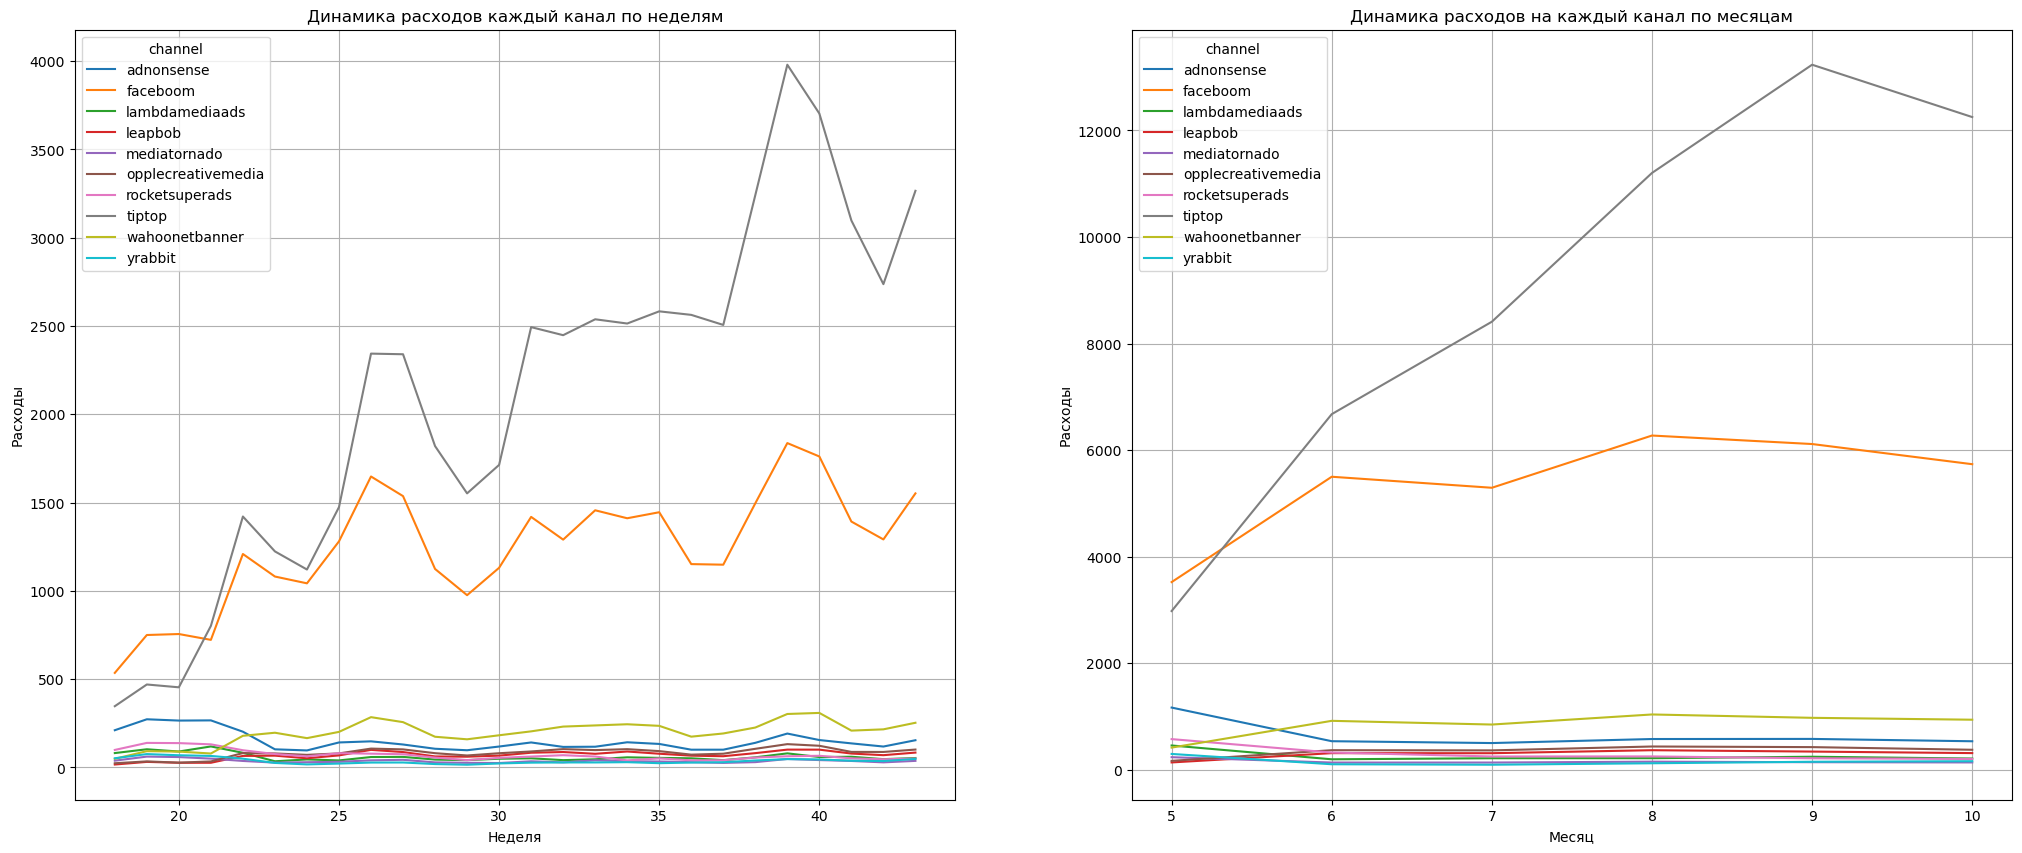

In [45]:
#визуализация
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
 
plt.figure(figsize=(25, 10))
 
costs.pivot_table(index='week',
                  columns='channel',
                  values='costs',
                  aggfunc='sum').plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Динамика расходов каждый канал по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
 
costs.pivot_table(index='month',
                  columns='channel',
                  values='costs',
                  aggfunc='sum').plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.title('Динамика расходов на каждый канал по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show();

Общая сумма расходов на маркетинг составила 105497.3
Больше всего средств было потрачено на источники "tiptop" - 54751.3 и "faceboom" - 32445.6.

Расходы по источникам "tiptop" и "faceboom" растут с течением времени, и составляют большую часть от общих расходов на маркетинг.

#### Расчет CAC из каждого источника привлечения
Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.\
Используйте профили пользователей.

In [46]:
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [47]:
channel_CAC = pd.DataFrame()
#исключим пользователей из источника "organic", т.к. отсутствуют затраты на их привлечение.
profiles = profiles.query('channel != "organic"')
channel_CAC['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
channel_CAC.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.1f}'})

,acquisition_cost_mean
channel,
tiptop,2.8
faceboom,1.1
adnonsense,1.0
lambdamediaads,0.7
wahoonetbanner,0.6
rocketsuperads,0.4
opplecreativemedia,0.2
yrabbit,0.2
mediatornado,0.2


In [48]:
#Средняя стоимость привлечения клиентов для всего проекта
profiles['acquisition_cost'].mean()

1.1274813239427588

Самыми "дорогими" для привлечения являются пользователи из источников "tiptop" - 2.8, "faceboom" - 1.1, "adnonsense" - 1.1.\
Стоимость привлечения одного клиента из канала "tiptop" более, чем в 2,5 раза превышает стоимость привлечения пользователей из остальных источников.\
Стоит оценить обратить более пристальное внимание на окупаемость затрат в источнике "tiptop".

#### Выводы:
- Общая сумма расходов на маркетинг составила 105497.3 Больше всего средств было потрачено на источник "tiptop" - 54751.3 и "faceboom" - 32445.6.
- Расходы по источникам "tiptop" и "faceboom" растут с течением времени, и составляют большую часть от общих расходов на маркетинг.
- Самыми "дорогими" для привлечения являются пользователи из источников "tiptop" - 2.8, "faceboom" - 1.1.

### Шаг. Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [49]:
# зададаим момент анализа
observation_date = datetime(2019, 11, 1).date()
# зададаим горизонт анализа
horizon_days = 14  

#### Окупаемость рекламы

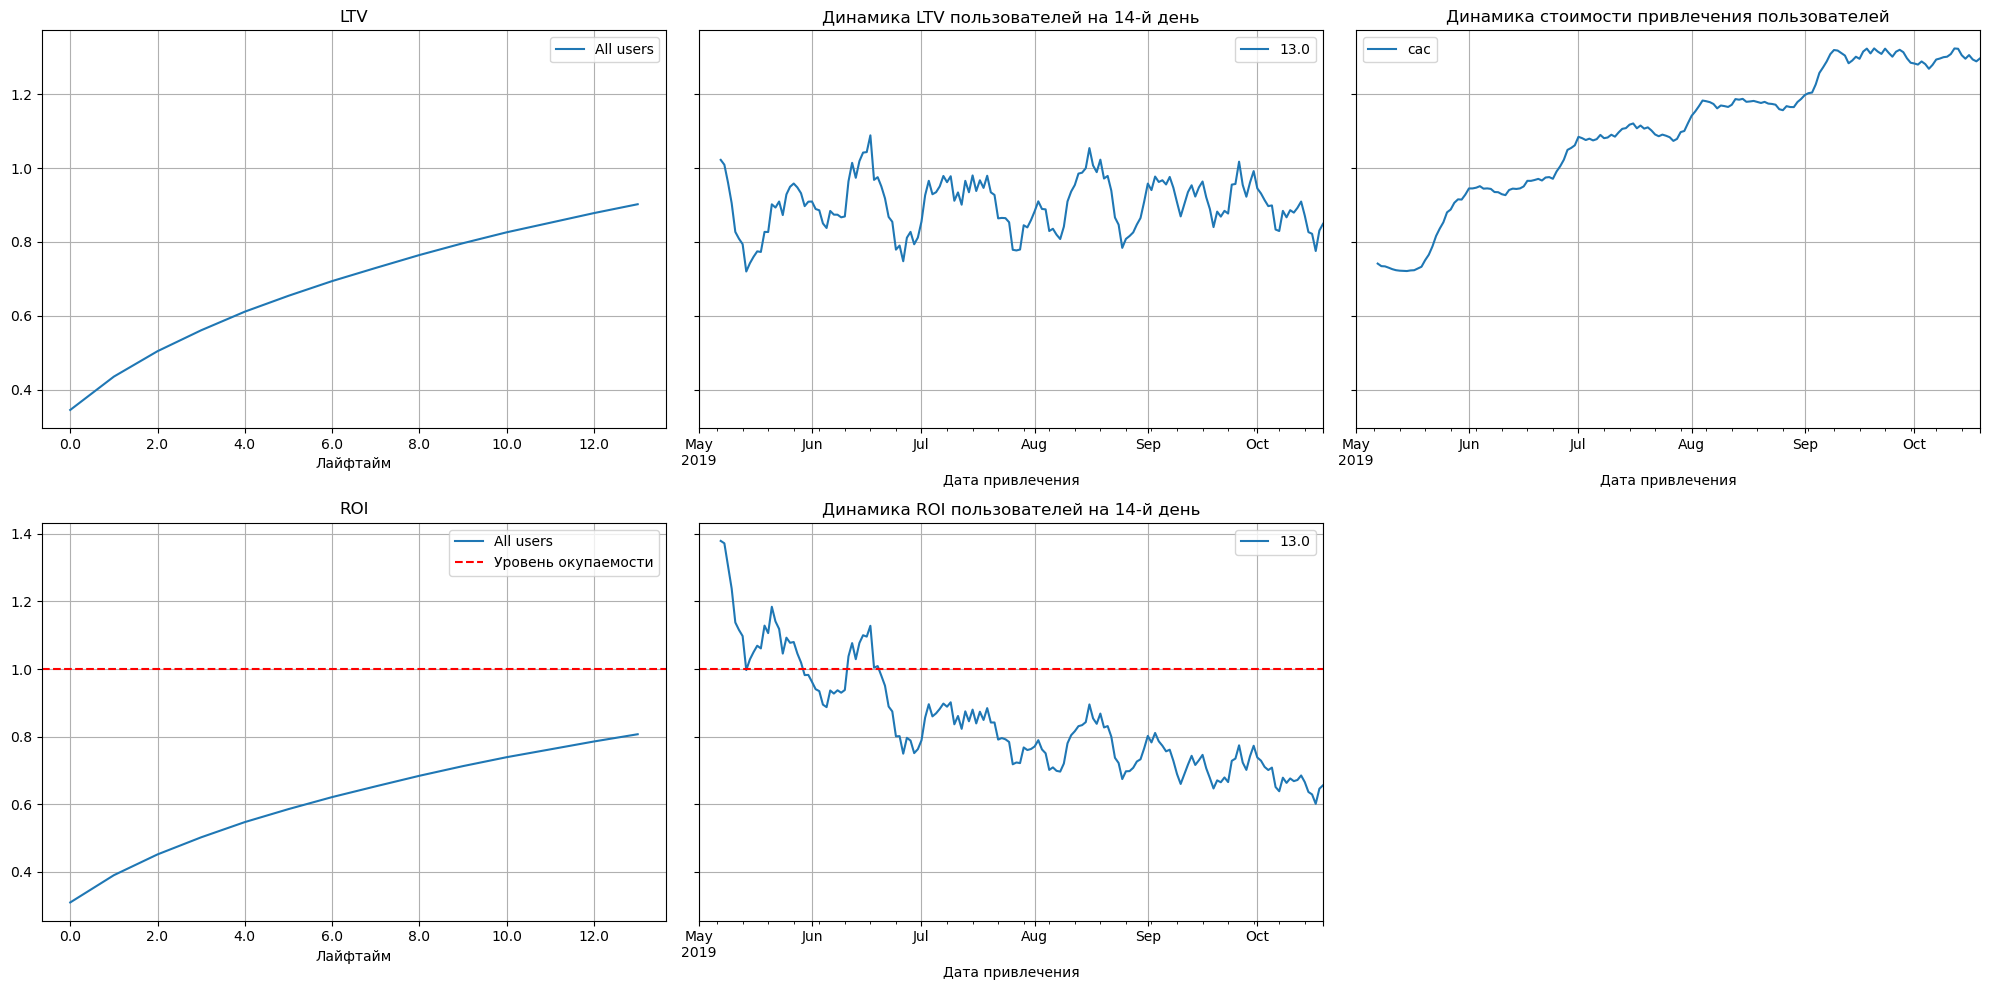

In [50]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам общей окупаемости рекламы можно сделать следующий вывод:

CAC резко ворастает, начиная с июня, и продолжает расти на протяжении всего времени анализа.
Затраты на привлечение пользователей возросли в 2,5 раза.

LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

ROI в конце недели = 80%, это значит, что реклама не окупается.
ROI опускается ниже уровня окупаемости начиная с конца мая, продолжая падать на протяжении всего рассматриваемого времени.

На окупаемость рекламы сильно повлияли заметно увеличившиеся расходы на привлечение пользователей.

#### Конверсия и удержание пользователей
Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

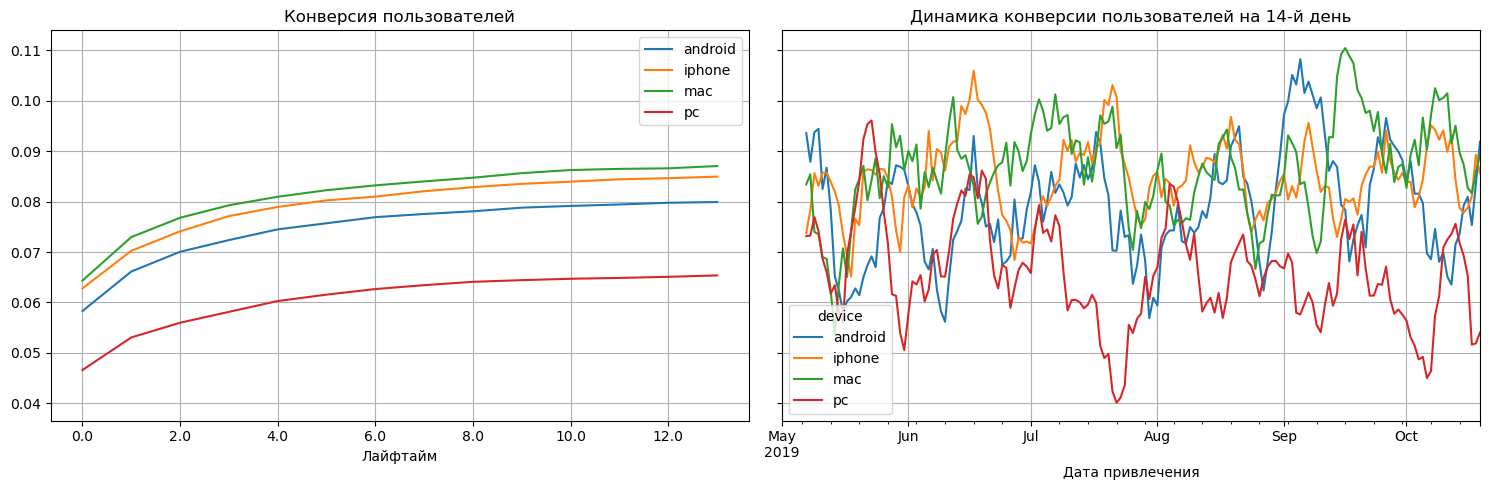

In [51]:
#Конверсия по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Наименьшая конверсия у пользователей устройства "pc", наибольшая - у пользователей "mac".

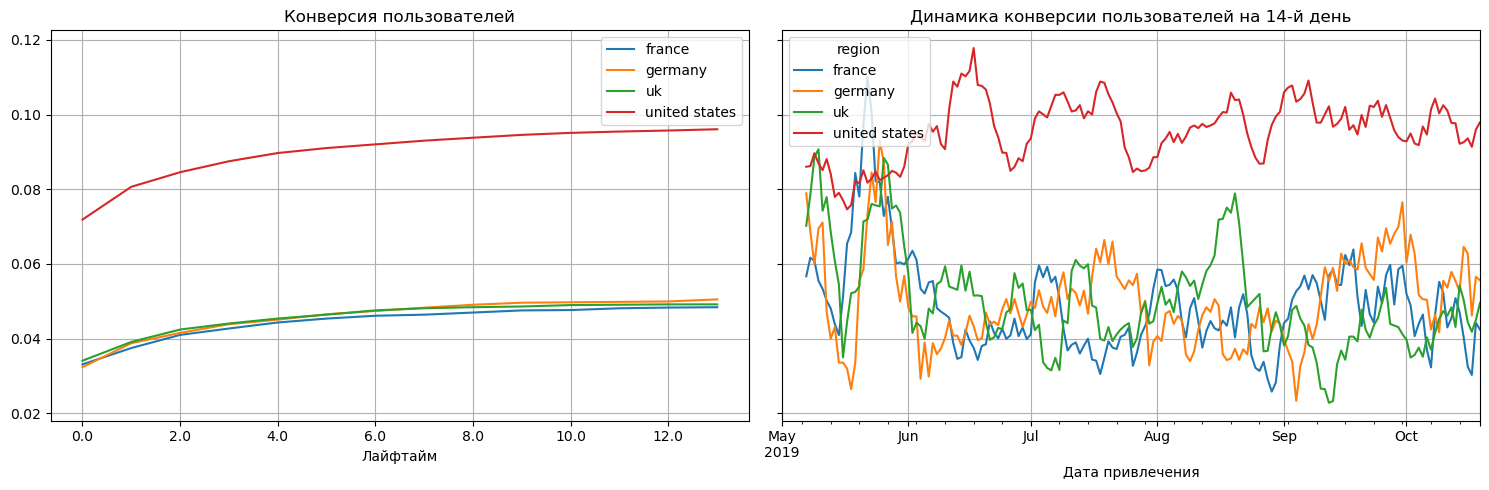

In [52]:
#Конверсия по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи из США конвертируются вдвое лучше, чем у пользователей из других стран.

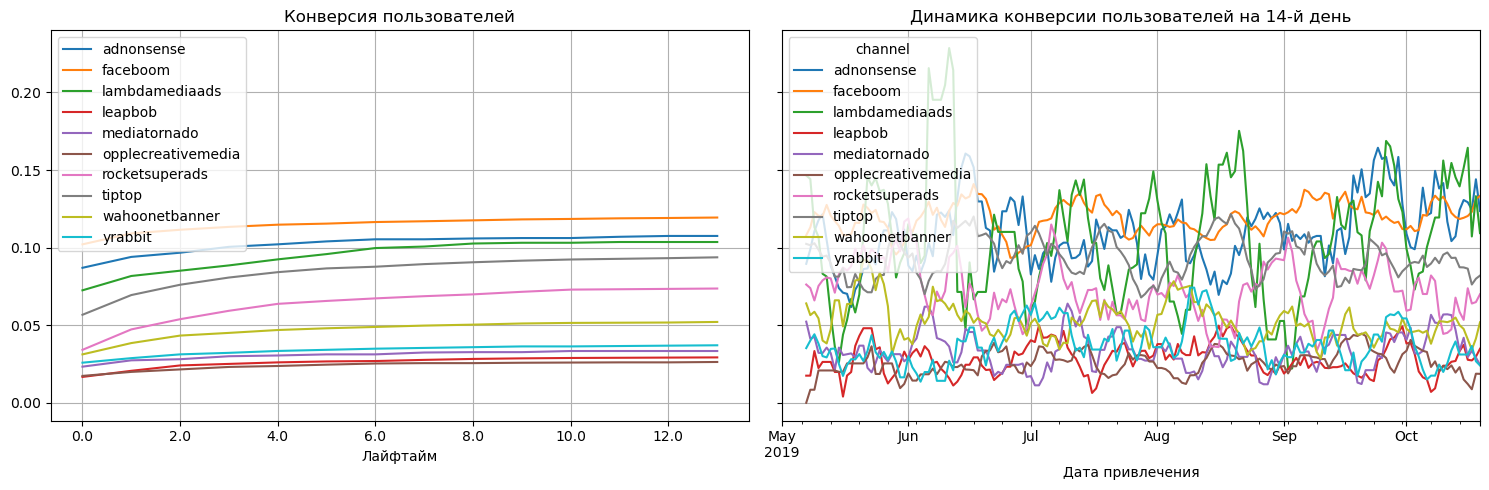

In [53]:
#Конверсия по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Лидирующими по конверсии каналами являются "faceboom", "adnonsense", "lambdamediaads".

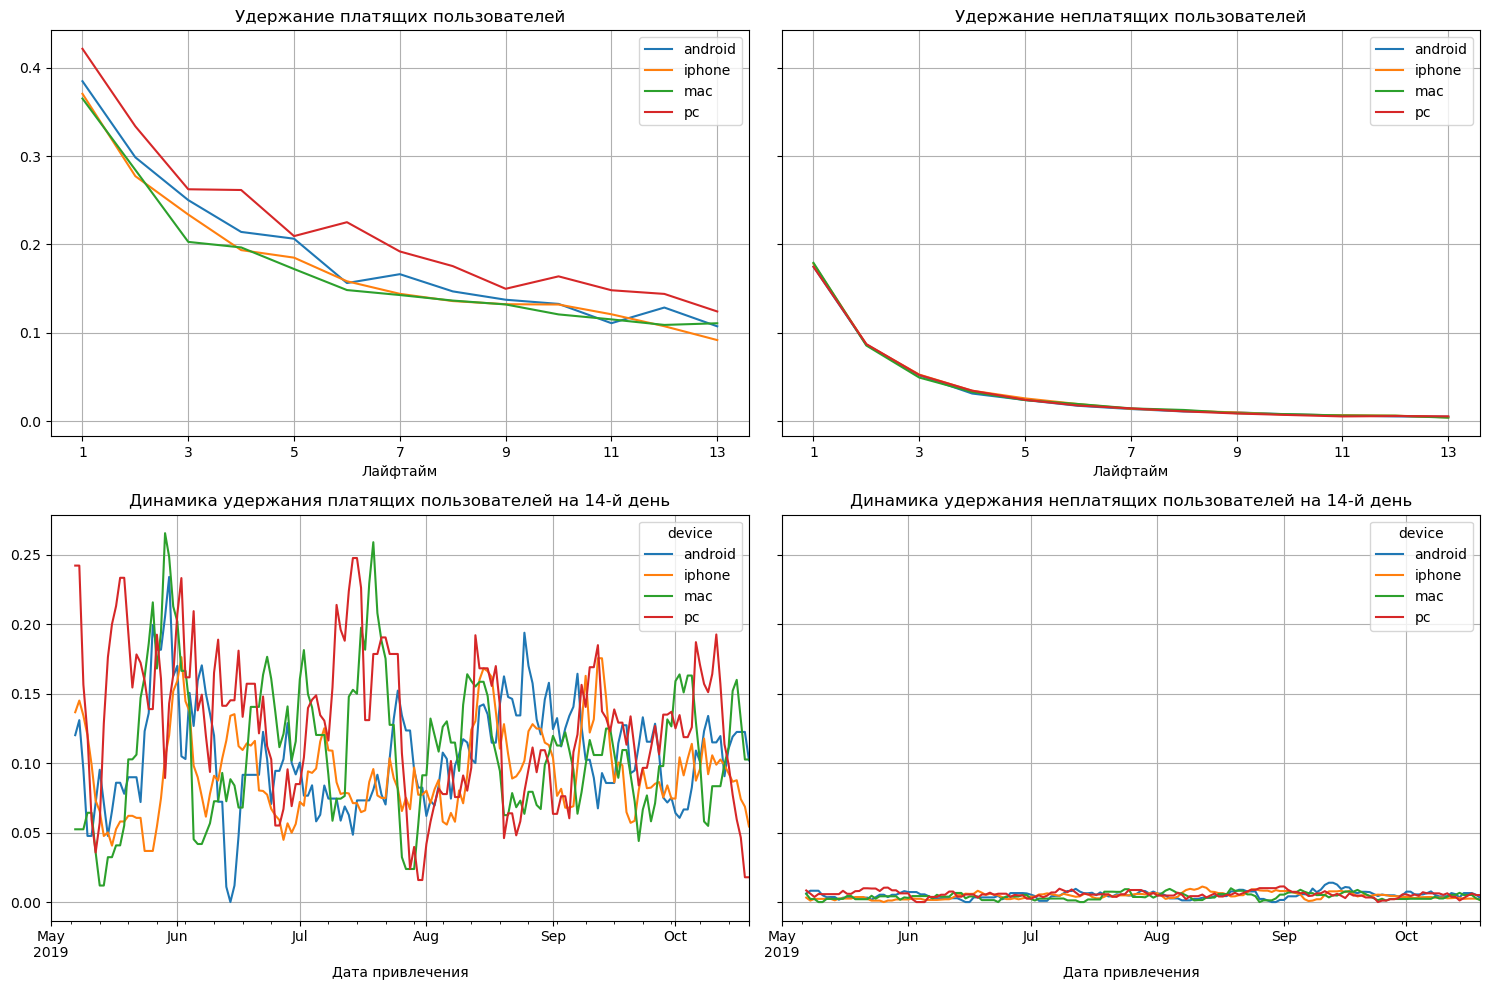

In [54]:
# удержание по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей устройств "pc" выше, чем у пользователей других устройств.

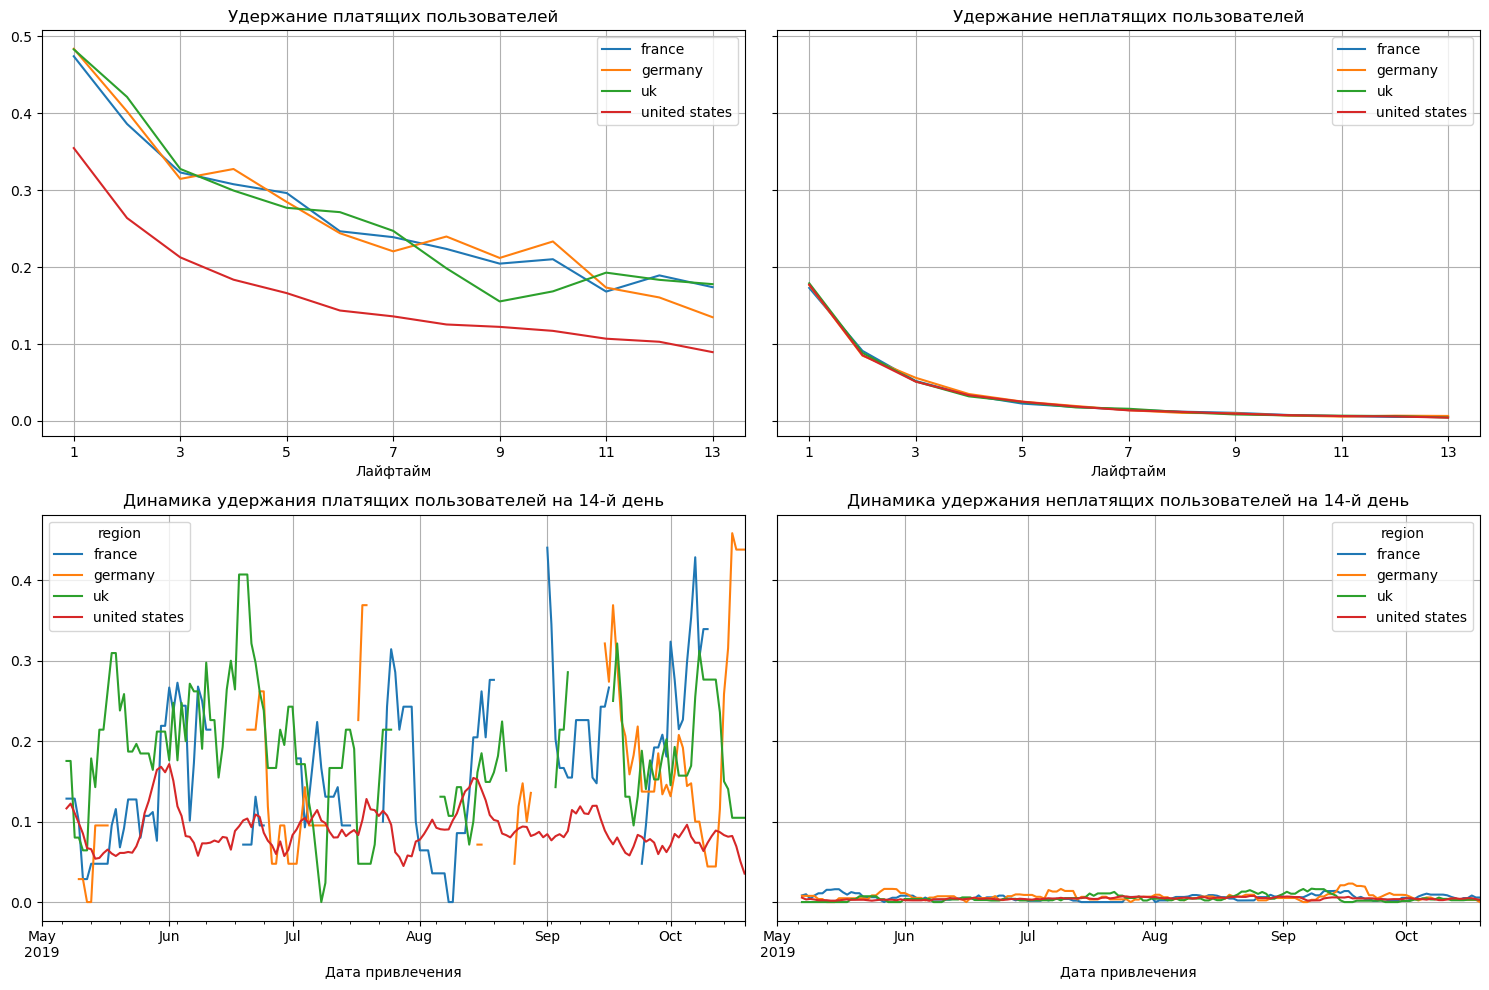

In [55]:
# удержание по странам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Показатель удержания неплатящих пользователей из США значительно ниже, чем у пользователей других стран.

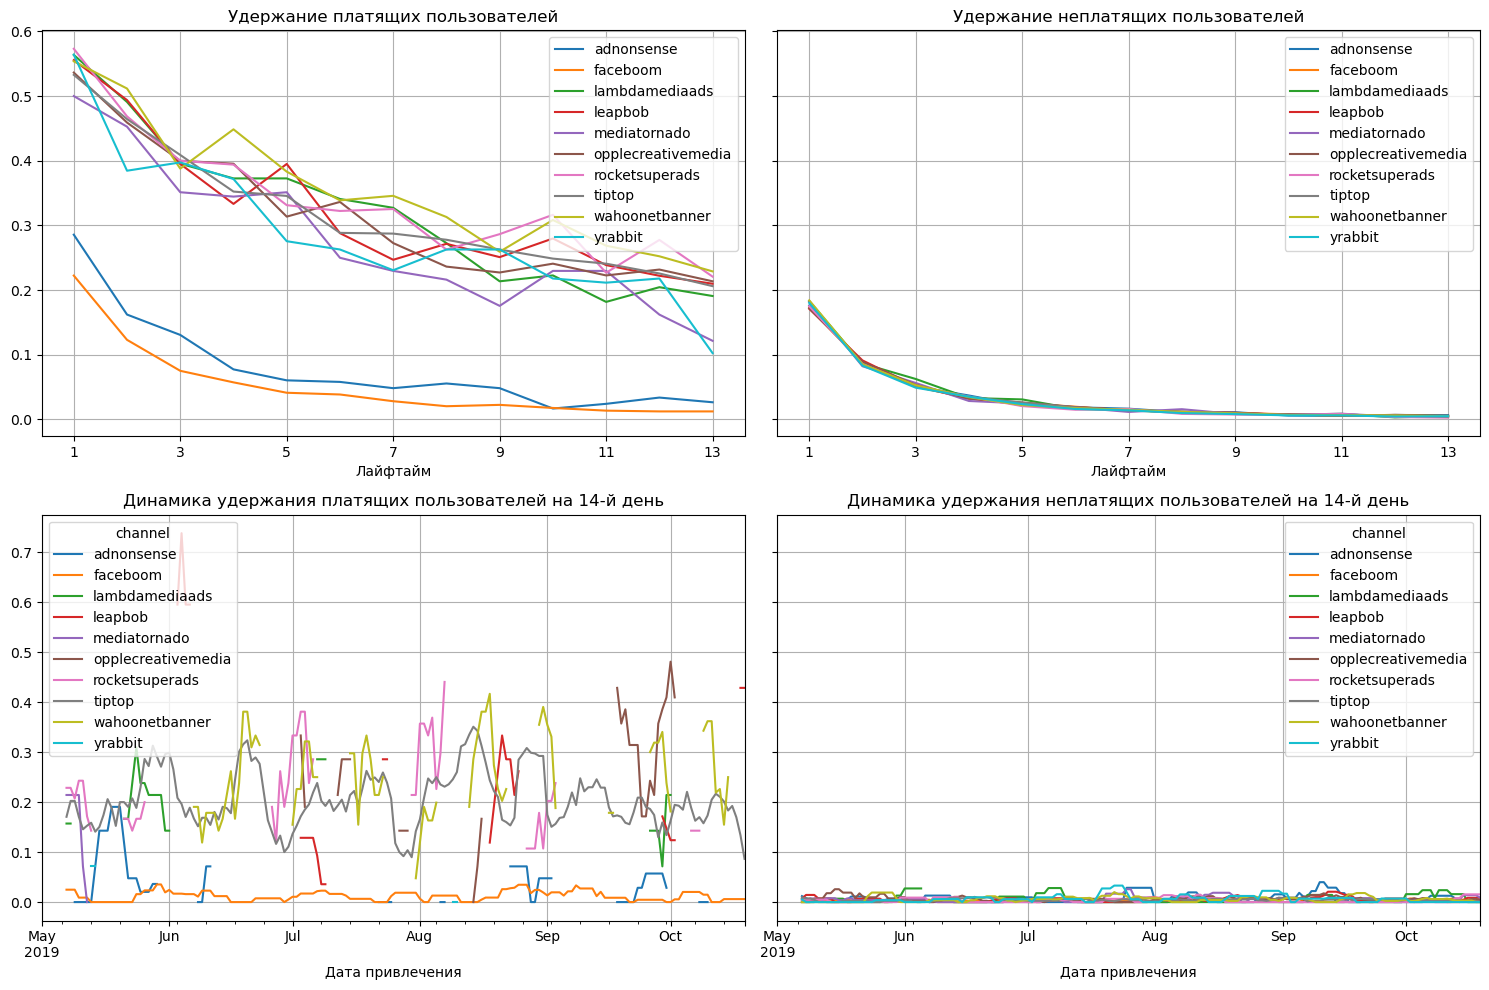

In [56]:
# удержание по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей из каналов привлечения "adnonsense" и "faceboom" самое низкое.

Удержание среди неплатящих пользователей в не зависимости от страны, устройства и каналов привлечения не имеет значимых различий.

#### Окупаемость рекламы по устройствам
Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

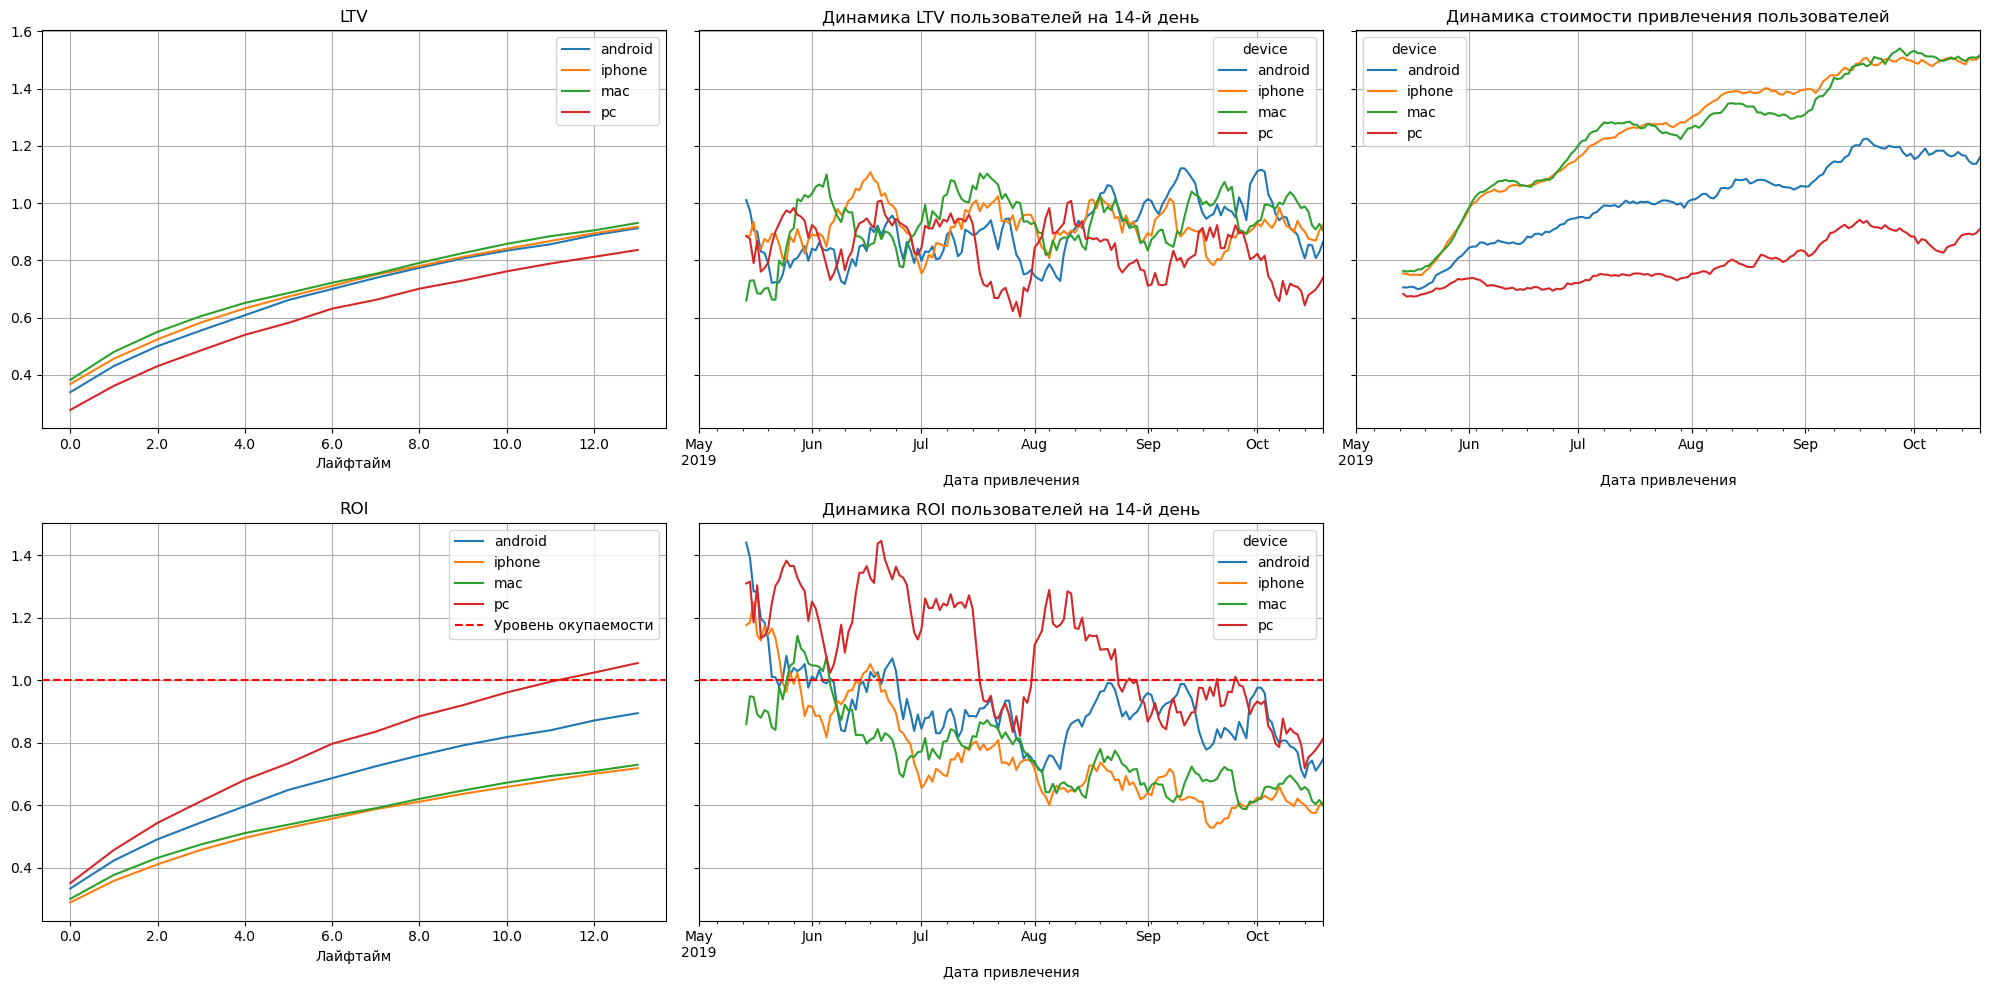

In [57]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Реклама не окупается для всех устройств, кроме PC. ROI для PC окупается в самом конце горизонта анализа - на 11 день из 14, что также является не самым оптимистичным результатом.
Стоимость привлечения стабильно растет. Самыми дорогими являются клиенты с устройствами "mac" и "iphone".
Лучше всего окупаются клиенты "pc", хуже всего - "mac" и "iphone". 

#### Окупаемость рекламы по странам
Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

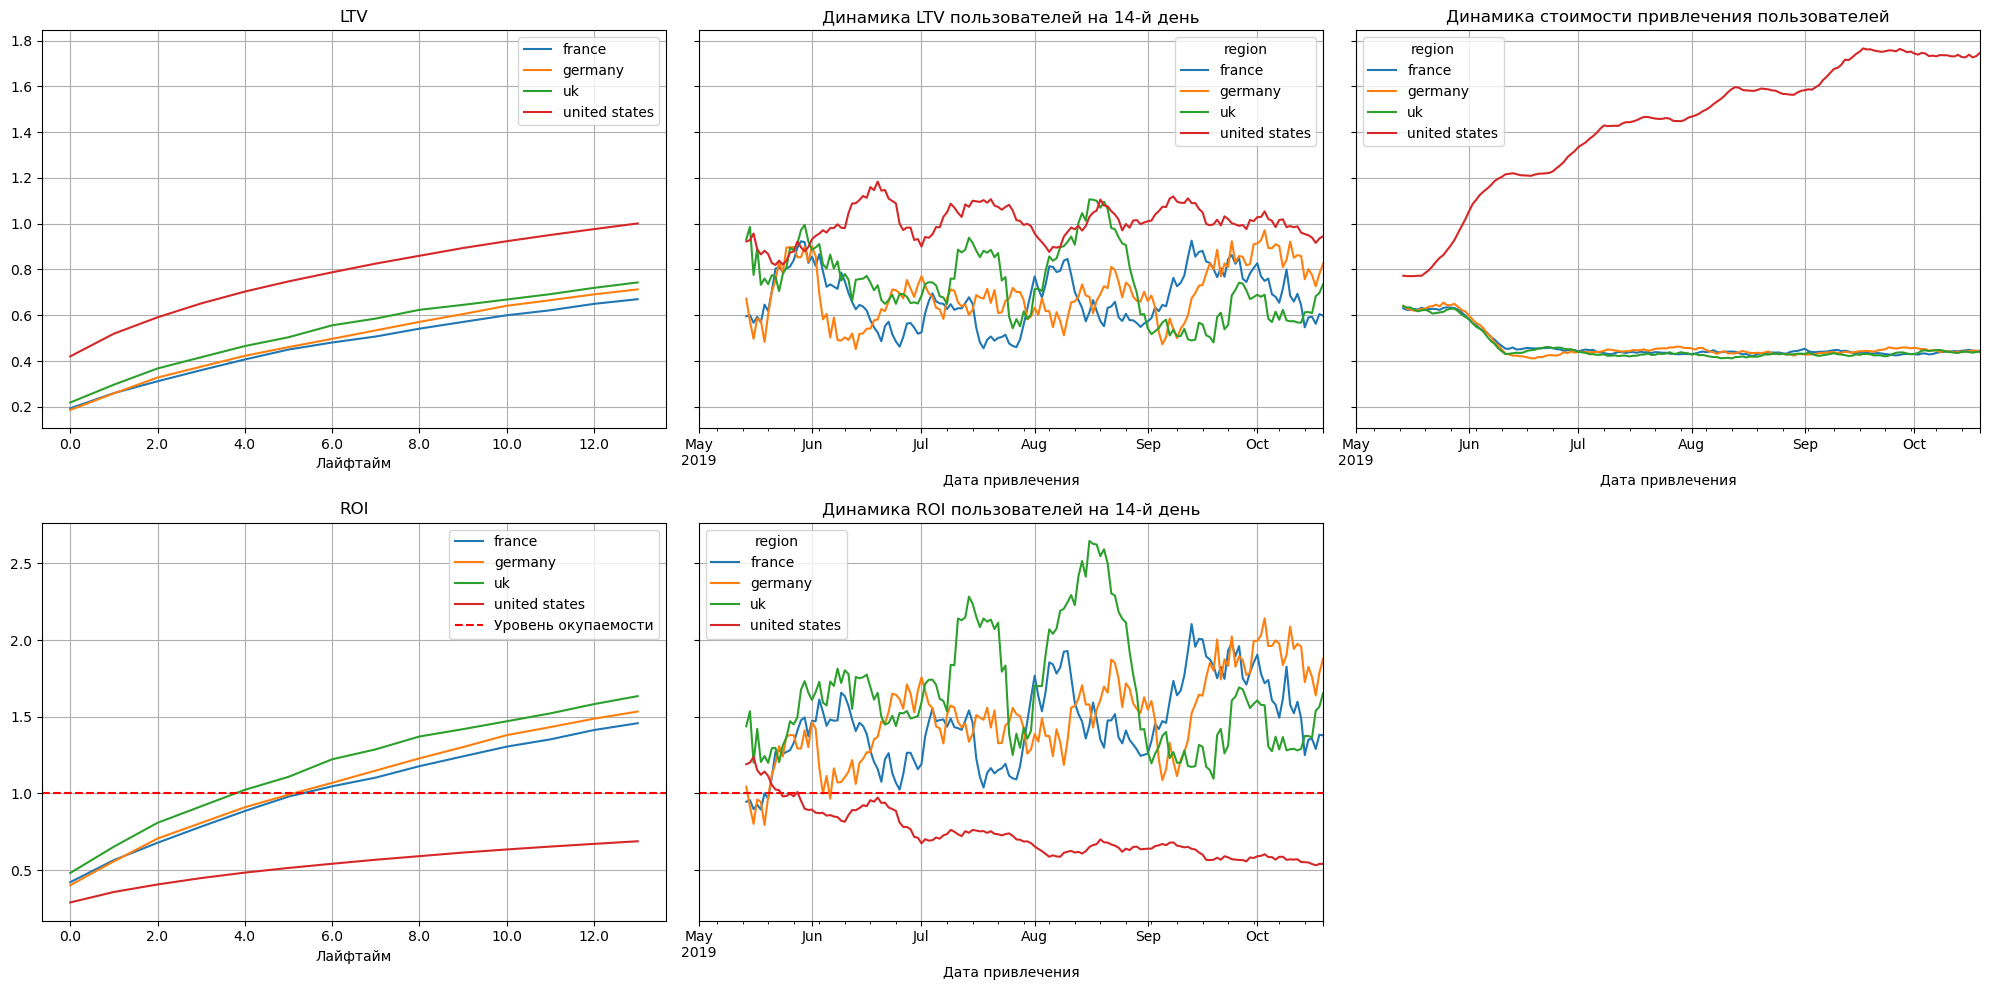

In [58]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Реклама окупается везде, кроме США.\
Динамика стоимости привлечения для США колоссально растет, а для остальных стран, наоборот, снижается к середине июня, и далее, имеет стабильно низкий уровень.\
LTV  для пользователей из США вдвое выше, чем у пользователей других стран, но затраты на рекламу не окупаются.
С остальными странами(Франция, Германия, Великобритания) ситуация при рассмотрении ROI & LTV противоположная:
уровень LTV пользователей из этих стран вдвое меньше, чем LTV пользователей из США. Эти страны успешно преодолели черту окупаемости, показав хороший результат.
Лучше всего окупаются Великобритания, Германия и Франция, США далека от уровня окупаемости.

#### Окупаемость рекламы по рекламным каналам
Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

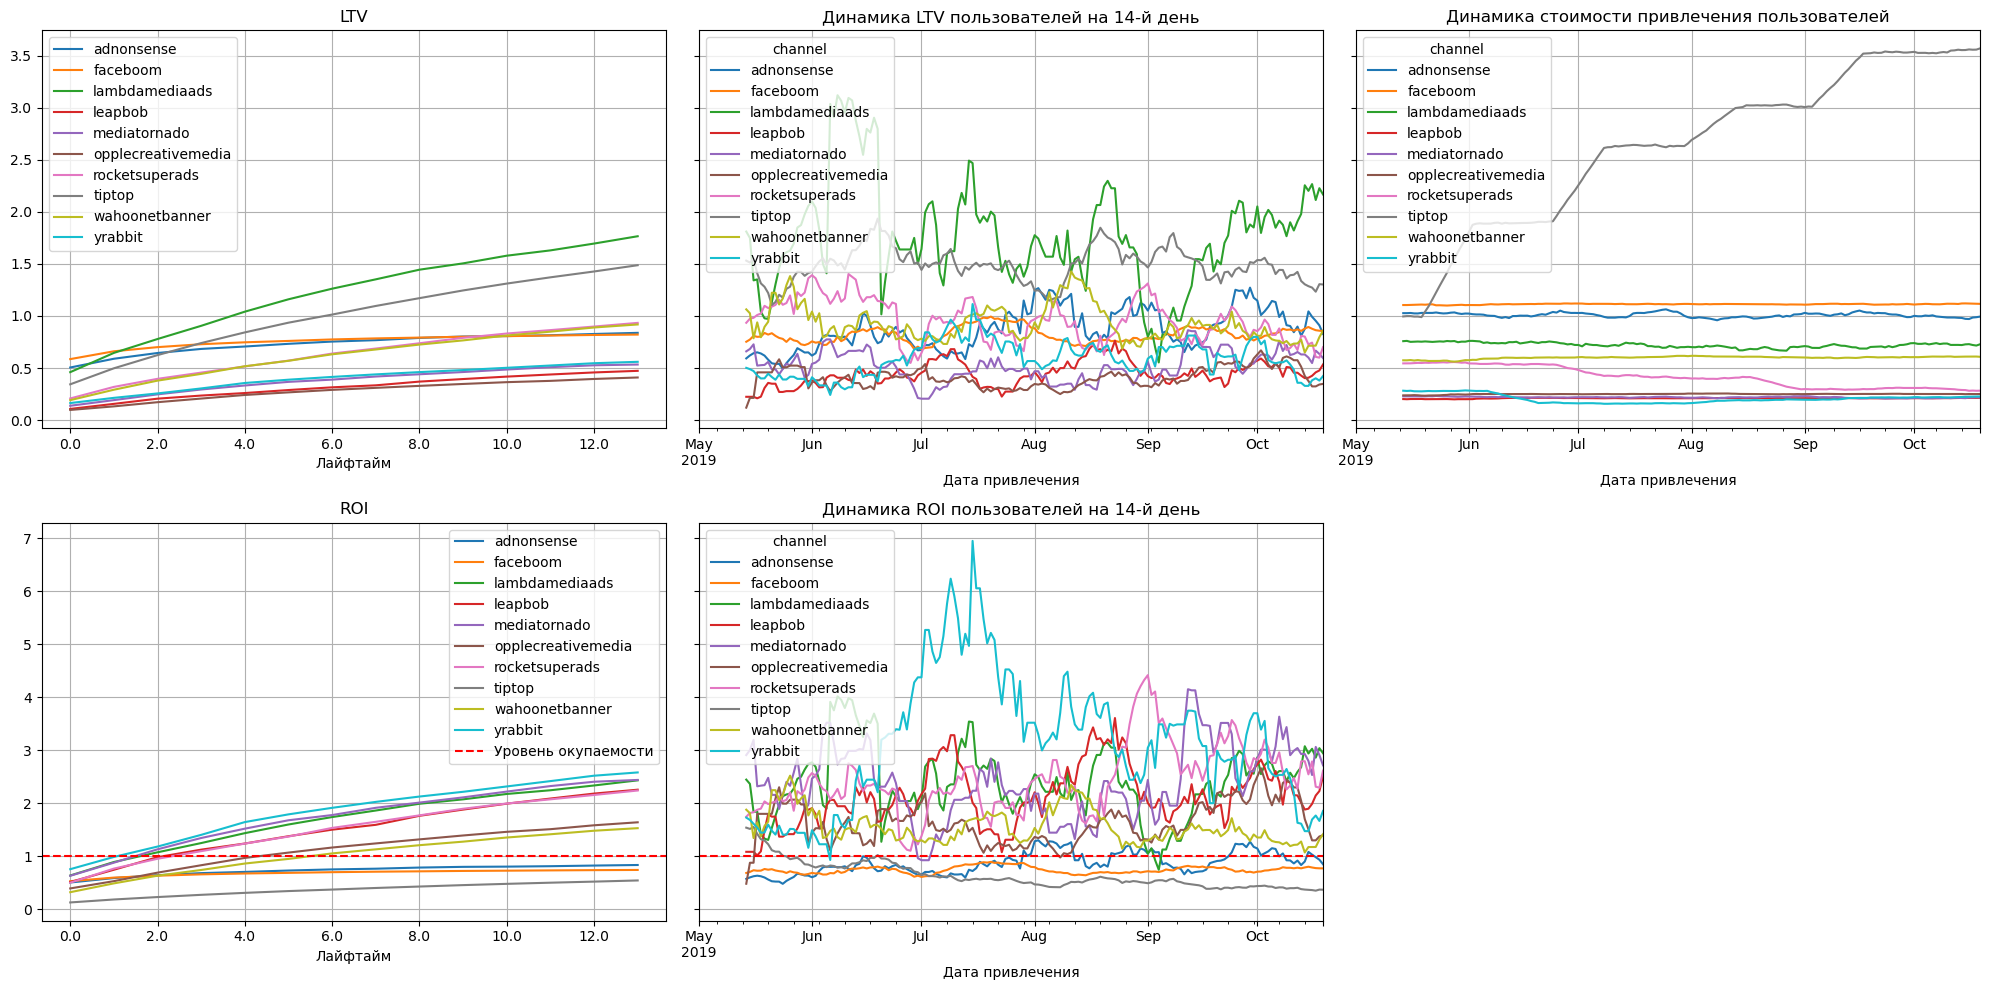

In [59]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Самые "ценные" клиенты приходят из источников "lambdamediaads" и "tiptop".
Динамика стоимости привлечения из канала "tiptop" растет рекордно быстрыми темпами, в то время как стоимость привлечения в остальных источниках стабильна.
Соответственно, показатель окупаемости канала "tiptop" является наихудшим, среди остальных источников.
Также, неокупается реклама из источников "adnonsense" и "faceboom".
Наилучшая окупаемость у канала "yrabbit".

#### Ответы на вопросы:


 *Окупается ли реклама, направленная на привлечение пользователей в целом?*
 
 Нет, реклама не окупается.
 К концу воторй недели (горизонт анализа составляет 14 дней) реклама окупается лишь на 80%.

*Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?*

Негативное влияние на окупаемость рекламы оказывают:
 - устройства: "mac", "iphone", "android"
 - страны: "Америка"
 - рекламные каналы: "tiptop", "adnonsense" и "faceboom"

*Чем могут быть вызваны проблемы окупаемости?*

Проблемы окупаемости могут быть вызваны перерасходом, некорректным распределением денежных средств между различными рекламными источниками. 

### Шаг. Итоговые выводы:
- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Для осуществления анализа бизнес-показателей была проведена предварительная подготовка данных, в которую вошли этапы:
 - Загрузка и ознакомление с данными.
 - Предобработка данных(устранение пропусков, приведение типов данных к необходимым).
 - Создание необходимых для дальнейшей работы функций.
 - Исследовательский анализ данных - были созданы профили пользователей и определен временной промежуток. Проанализировали и визуализировали поведение платящих пользователей в зависимости от устройства, страны и канала привлечения.
 
Среди причин неэффективности привлечения пользователей были выявлены:

 - Вероятное наличие проблем в работе приложения на устройствах "mac" и "iphone". Таких пользователей больше всего, они самые дорогостоящие в привлечении, но приносят меньше всего прибыли.
 - Необоснованное большое вложение средств в канал "tiptop", он является явно убыточным.
 - Реклама в источниках "adnonsense" и "faceboom" оказалась неэффективной по причине низких показателей удержания пользователей.
 - рекламная кампания приложения направлена преимущественно на жителей США. У них высокий уровень конверсии, но затраты на привлечение таких пользователей не окупаются
 
Рекомендации для отдела маркетинга.
 - обратить внимание на рекламный канал lambdaMediaAds, т.к. это канал с максимальным LTV. Из него приходят 10,5% платящих пользователей, при этом стоимость привлечения достаточно невысока, в сравнении с каналом "tiptop" - 0,7 против 2,8. Есть и другие, более "выгодные" каналы привлечения клиентов, например: Yrabbit, MediaTornado. Стоит закупать рекламу в таких источниках, где показательокупаемости(ROI) выше.
 - Выяснить, существуют ли перебои в работе приложения на устройствах "mac" и "iphone".
 - Привлекать больше PC и Android пользователей.
 - создать рекламную кампанию по привлечению пользователей из Франции, Германии и Великобритании, а не только из США.